<a href="https://colab.research.google.com/github/taranaalex/MLPNS_ATarana/blob/main/trees_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!kaggle --version

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [ ]:
!chmod 600 kaggle.json

In [ ]:
ls -l *kaggle*

-rw------- 1 root root 66 Apr 13 15:48 kaggle.json


In [ ]:
envs = json.load(open('kaggle.json','r'))

In [ ]:
os.environ['KAGGLE_USERNAME'] = envs['username']
os.environ['KAGGLE_KEY'] = envs['key']

In [ ]:
!kaggle --version

Kaggle API 1.5.13


In [ ]:
!kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           7140        266  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36            742         27  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           2772         70  1.0              
omartorres25/honda-data                                     

In [ ]:
!kaggle datasets list -s titanic

ref                                                 title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
heptapod/titanic                                    Titanic                                         11KB  2017-05-16 08:14:22          53976        994  0.7058824        
brendan45774/test-file                              Titanic dataset                                 11KB  2021-12-02 16:11:42          54972        539  1.0              
azeembootwala/titanic                               Titanic                                         12KB  2017-06-05 12:14:37          16214        162  0.8235294        
rahulsah06/titanic                                  Titanic                                         34KB  2019-09-16 14:43:23           5649     

In [ ]:
cd MLPNS2023

[Errno 2] No such file or directory: 'MLPNS2023'
/content/gdrive/My Drive


In [ ]:
!mkdir kaggleTitanic

In [ ]:
cd kaggleTitanic

/content/gdrive/My Drive/kaggleTitanic


In [ ]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 5.04MB/s]


In [ ]:
!ls

titanic.zip


In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
!ls

gender_submission.csv  test.csv  titanic.zip  train.csv


In [ ]:
titanic = pd.read_csv('train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
titanic = titanic[['Pclass', 'Sex','Age']]

In [ ]:
titanic.shape

(891, 3)

In [ ]:
titanic.describe()

,Pclass,Age
count,891.000000,714.000000
mean,2.308642,29.699118
std,0.836071,14.526497
min,1.000000,0.420000
25%,2.000000,20.125000
50%,3.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


In [ ]:
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [ ]:
titanic.dropna(inplace=True)

<ipython-input-29-0e9622e1a85c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.dropna(inplace=True)


In [ ]:
titanic.describe()

,Pclass,Age
count,714.000000,714.000000
mean,2.236695,29.699118
std,0.838250,14.526497
min,1.000000,0.420000
25%,1.000000,20.125000
50%,2.000000,28.000000
75%,3.000000,38.000000
max,3.000000,80.000000


In [ ]:
titanic['gender'] = titanic['Sex'].map({'male':0, 'female':1})

<ipython-input-31-c9c3a16cfe42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['gender'] = titanic['Sex'].map({'male':0, 'female':1})


In [ ]:
titanic

,Pclass,Sex,Age,gender
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
885,3,female,39.0,1
886,2,male,27.0,0
887,1,female,19.0,1
889,1,male,26.0,0


In [ ]:
titanic.drop('Sex',axis=1,inplace=True)

<ipython-input-34-a468b523652c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic.drop('Sex',axis=1,inplace=True)


In [ ]:
from sklearn import tree

In [ ]:
clf = tree.DecisionTreeClassifier(random_state=22,max_depth=5)

In [ ]:
titanic_target = pd.read_csv("train.csv")[["Survived", "Age",
                                           "Pclass", "Sex"]].dropna()
titanic_target

,Survived,Age,Pclass,Sex
0,0,22.0,3,male
1,1,38.0,1,female
2,1,26.0,3,female
3,1,35.0,1,female
4,0,35.0,3,male
...,...,...,...,...
885,0,39.0,3,female
886,0,27.0,2,male
887,1,19.0,1,female
889,1,26.0,1,male


In [ ]:
titanic_target = titanic_target["Survived"]

In [ ]:
clf.fit(titanic.values, titanic_target.values)

DecisionTreeClassifier(max_depth=5, random_state=22)

In [ ]:
clf.score(titanic.values, titanic_target.values)

0.8263305322128851

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, feature_names=titanic.columns, 
                                out_file=None) 
graph = graphviz.Source(dot_data)

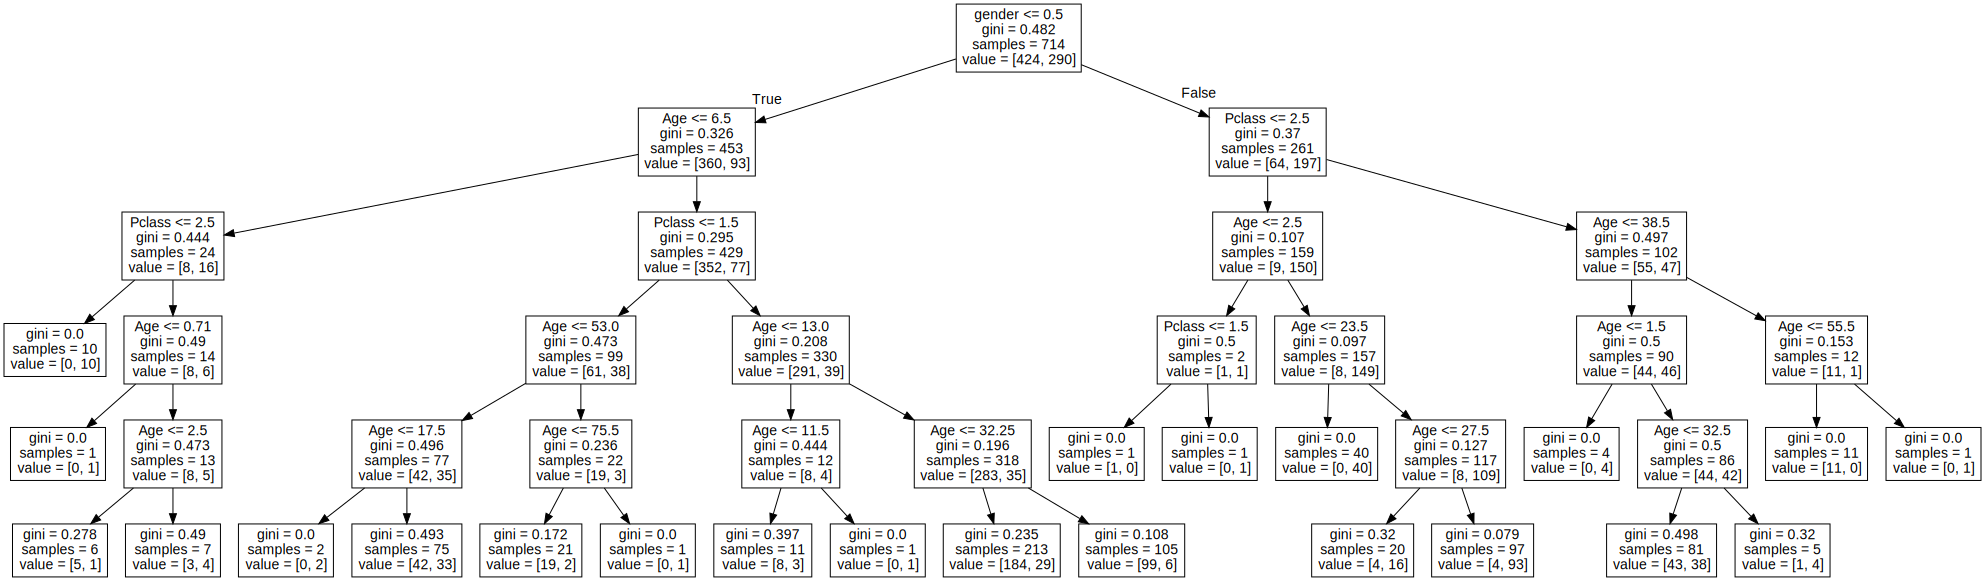

In [ ]:
graph

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(titanic.values, titanic_target.values, test_size=0.2)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=22)

In [ ]:
clf.score(X_train, y_train)

0.8476357267950964

In [ ]:
clf.score(X_test, y_test)

0.7902097902097902

In [ ]:
# Se la performance sul test set è molto peggiore di quella sul training set,
# c'è stato overfitting. In tal caso occorre cambiare gli hyperparameters

In [ ]:
clf2 = tree.DecisionTreeClassifier(max_depth=3, random_state=222)

In [ ]:
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=222)

In [ ]:
clf2.score(X_test, y_test)

0.7552447552447552

In [ ]:
clf0 = tree.DecisionTreeClassifier(random_state=222).fit(X_train, y_train)

In [ ]:
clf0.score(X_train, y_train)

0.9054290718038529

In [ ]:
clf0.score(X_test, y_test)

0.7832167832167832